# Task 3 Exploratory Data Analysis: Retail
As a business manager try to find the 'weak areas' where you can make more profit 

Author: Raghu Madhav Tiwari

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.shape

(9994, 13)

In [5]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
data.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.drop("Postal Code",axis=1,inplace=True)

### Undertanding relationships between numerical data

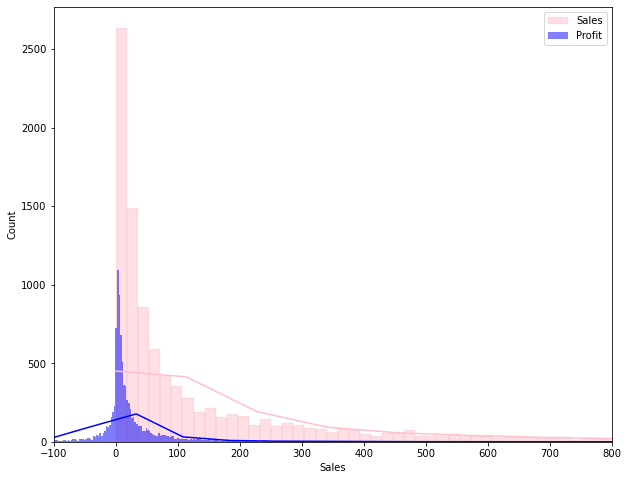

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(data['Sales'],color='pink',label='Sales',kde=True)
sns.histplot(data['Profit'],color='Blue',label='Profit',kde=True)
plt.xlim([-100,800])
plt.legend()

<AxesSubplot:>

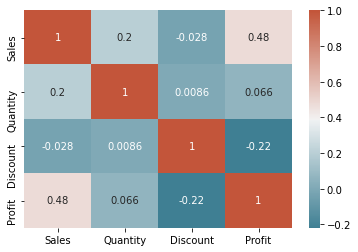

In [10]:
# calculate correlation matrix
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

the correlation plot shows that there is a positive correlation between Sales and Profit and a negative correlation between 
Profit and Discount. 

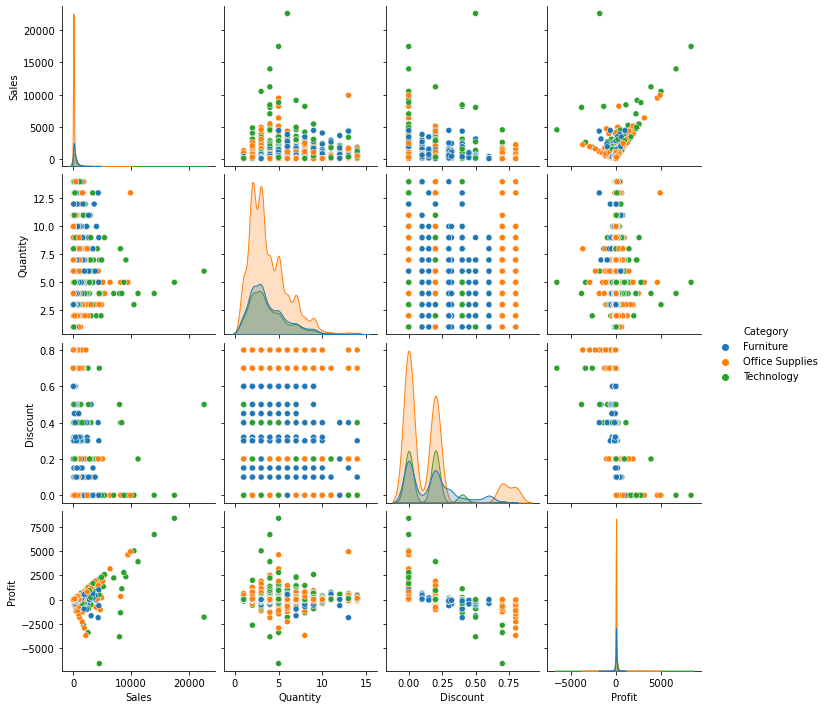

In [11]:
g = sns.pairplot(data,hue="Category")

### Understanding Relkationships between categorical data

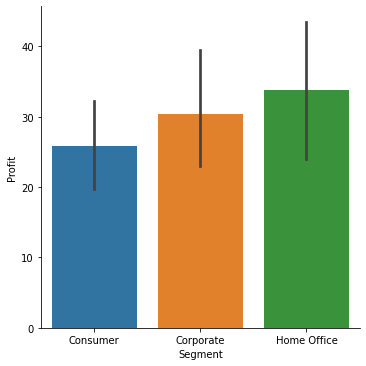

In [12]:
sns.catplot(x="Segment",y="Profit",data=data,kind='bar',ci=95)

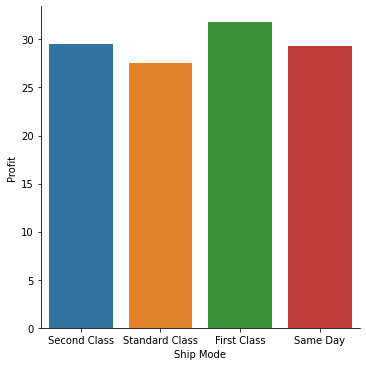

In [13]:
sns.catplot(x="Ship Mode",y="Profit",data=data,kind='bar',ci=None)

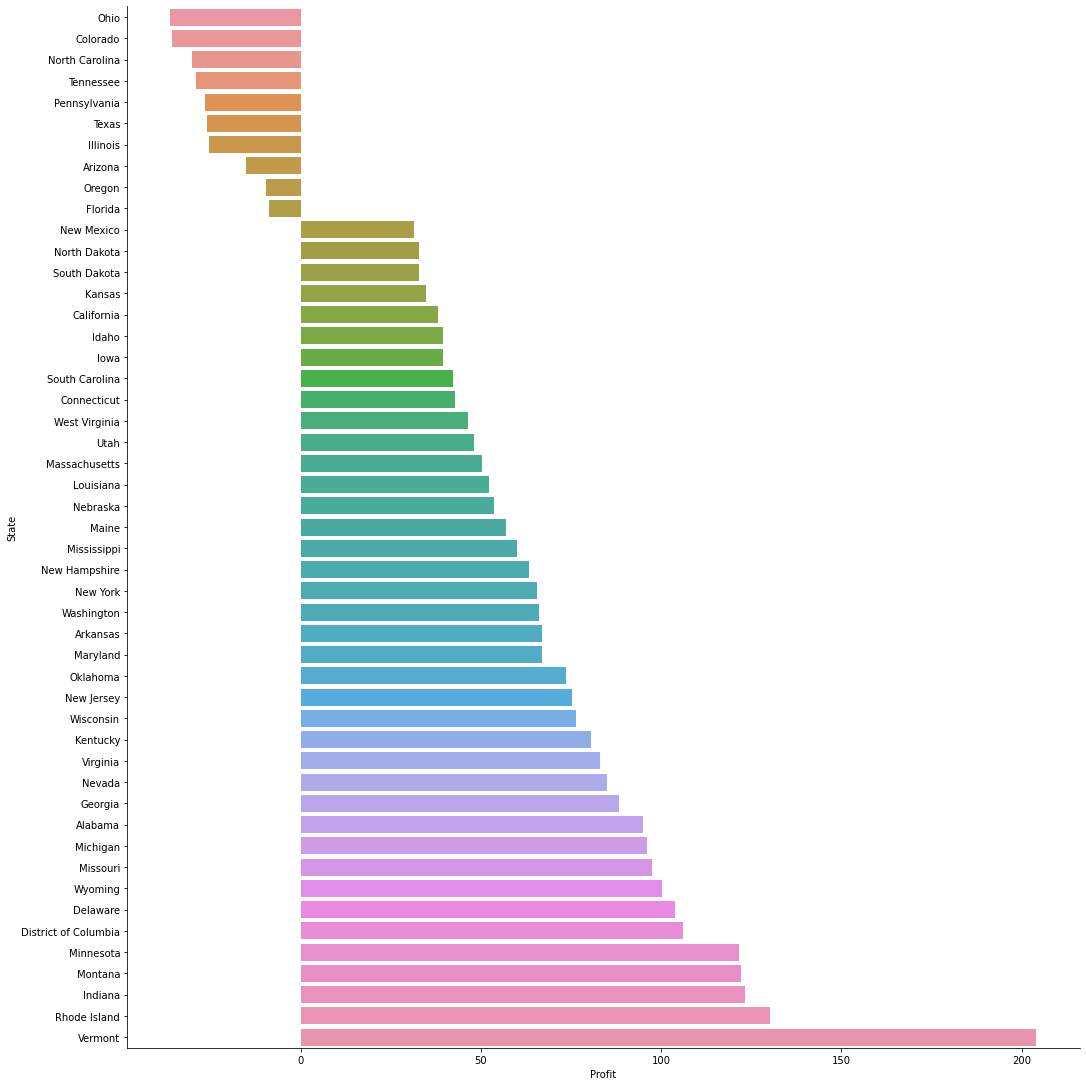

In [14]:
order = data.groupby(["State"])["Profit"].mean().sort_values().index
sns.catplot(y="State",x="Profit",data=data,kind='bar',ci=None,height=15,order=order)

we observe states like Ohio, North Carolina, Illinois yeild avg loss

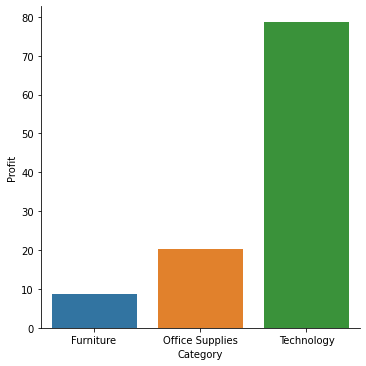

In [15]:
sns.catplot(x="Category",y="Profit",data=data,kind="bar",ci=None)

There is significantly high profits in the 'Technology' category and lesser profit in 'Furtniture' category.

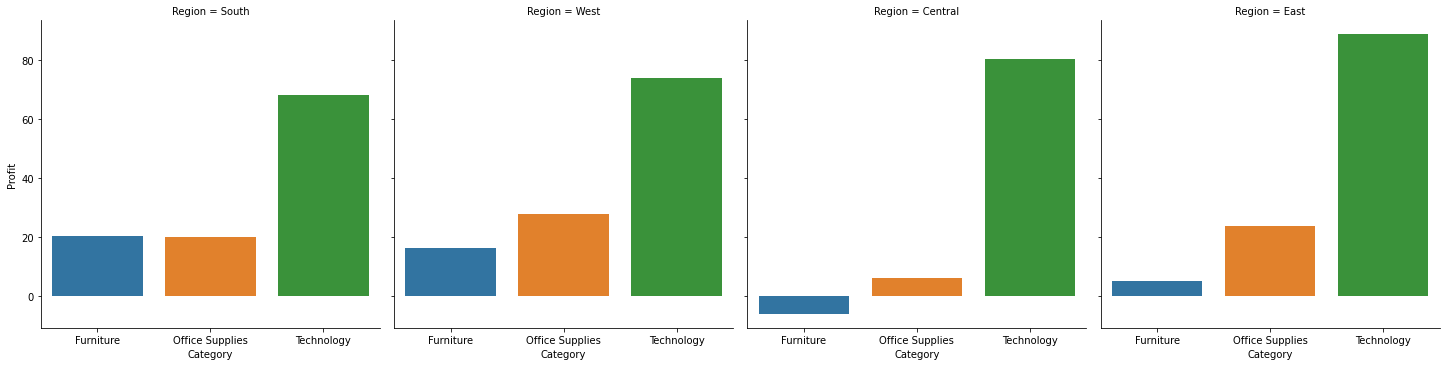

In [16]:
sns.catplot(x="Category",y="Profit",data=data,kind='bar',ci=None,col="Region")

Selling Furtinure in Central region is not advised.

<AxesSubplot:xlabel='count', ylabel='State'>

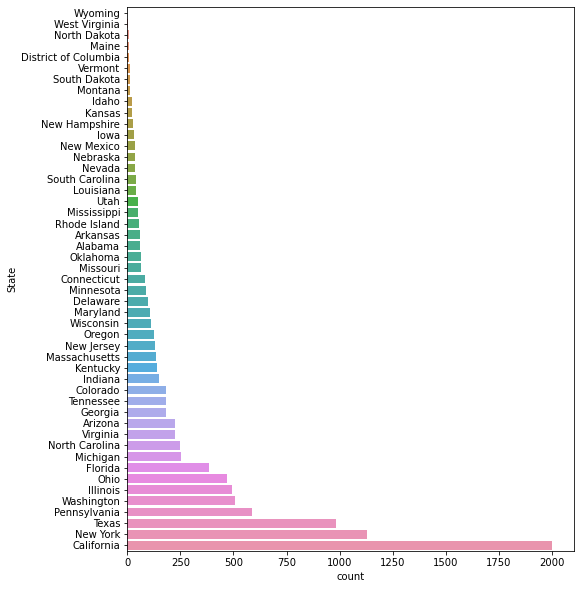

In [17]:
# count plot
plt.subplots(figsize=(8,10))
order=data.groupby(['State'])["State"].count().sort_values().index
sns.countplot(y='State',data=data,order=order)

Conclusion:\
Thus the exploratory data analysis on the dataset 'SampleSuperstore' has been analyzed carefully. Some of the observations are given below:\
1. Most number customers are found in California, New York and  Texas. Hence these states can be concentrated upon to generate more profit.
2. Few states like Wyoming, North Dakota and West Virginia have little to no sales at all. Hence, these states need to be reviewed.
3. More profit is generated with the sales of Technology goods, hence Sales can be broadened on for this category. On the other hand, furniture sales have not generated significant profits.
4. Selling Furtinure in Central region is loss-making.
5. Selling Furtinure in Eastern region is least profitable among all other regions and categories.
5. Profits among different segment do not vary much. 